### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [301]:
using Pkg
Pkg.add("QuadGK")
Pkg.add("Polynomials")
using QuadGK
using Polynomials

  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `/opt/julia/environments/v1.5/Project.toml`
No Changes to `/opt/julia/environments/v1.5/Manifest.toml`


In [302]:
Polynomial([1])

Polynomial(1)

In [303]:
Polynomial([0, 1, 1])

Polynomial(x + x^2)

In [304]:
function legendre(k)
    if k == 0
        return Polynomial([1])
    elseif k == 1
        return Polynomial([0,1])
    else
        return ((2 * k - 1)/(k))*Polynomial([0,1])*legendre(k - 1)-((k - 1)/k)*legendre(k - 2)
    end
end

legendre (generic function with 1 method)

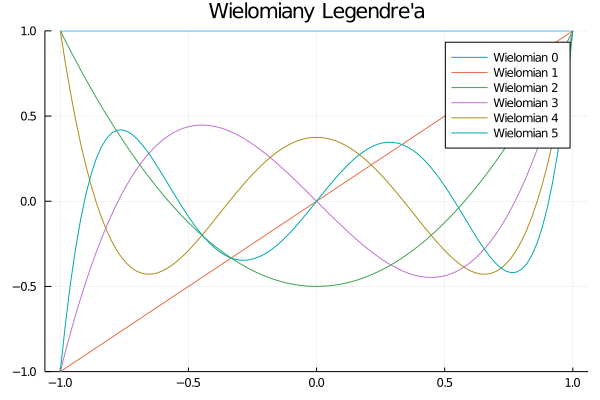

In [305]:
using Plots
p = plot(legendre(0), -1, 1,label = "Wielomian 0",  ylim=(-1,1),title = "Wielomiany Legendre'a")
for k in 1:5
    name = "Wielomian "*string(k)
    plot!(legendre(k), -1, 1, label = name)
end
p

In [306]:
for k in 2:4
    println("Wielomian ",k," stopnia:")
    (xp,a)=gauss(Float64,k)
    rts = roots(legendre(k))
    xp = sort(xp)
    rts = sort(rts)
    
    for i in 1:length(xp)
        println("-----",i, " pierwiastek", "-----")
        println("Pierwiastek Legendre'a: ", rts[i])
        println("Odcięta Gaussa: ", xp[i])
        println("Są równe: ", abs(rts[i] - xp[i]) < 1e-10 )
        println()
    end
    println("\n\n")
end

Wielomian 2 stopnia:
-----1 pierwiastek-----
Pierwiastek Legendre'a: -0.5773502691896258
Odcięta Gaussa: -0.5773502691896258
Są równe: true

-----2 pierwiastek-----
Pierwiastek Legendre'a: 0.5773502691896256
Odcięta Gaussa: 0.5773502691896258
Są równe: true




Wielomian 3 stopnia:
-----1 pierwiastek-----
Pierwiastek Legendre'a: -0.7745966692414834
Odcięta Gaussa: -0.7745966692414834
Są równe: true

-----2 pierwiastek-----
Pierwiastek Legendre'a: 0.0
Odcięta Gaussa: 0.0
Są równe: true

-----3 pierwiastek-----
Pierwiastek Legendre'a: 0.7745966692414835
Odcięta Gaussa: 0.7745966692414834
Są równe: true




Wielomian 4 stopnia:
-----1 pierwiastek-----
Pierwiastek Legendre'a: -0.8611363115940536
Odcięta Gaussa: -0.8611363115940526
Są równe: true

-----2 pierwiastek-----
Pierwiastek Legendre'a: -0.33998104358485653
Odcięta Gaussa: -0.3399810435848563
Są równe: true

-----3 pierwiastek-----
Pierwiastek Legendre'a: 0.3399810435848563
Odcięta Gaussa: 0.3399810435848563
Są równe: true

-----4 p

### Związek równości pierwiastków wielomianu Legendre'a z odciętymi Gaussa.
Fragement wykładu:
Odcięte xi n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a,b] są zerami wielomianu ortogonalnego φn(x) dla tegosamego przedziału i tej samej funkcji ważącej.

Uzasadnienie: W najprostszej postaci dla funkcji ważącej w(x) = 1, wielomianem ortagonalnym dla kwadratury Gaussa jest wielomian Legendre'a. Wtedy ta kwadratura jest nazywana kwadraturą Gaussa-Legendre'a.


### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa

### Związek z twierdzeniem o stopniu dokładności kwadratury Gaussa
Kwadratura ma stopień dokładności 2n−1 (dla n-punktowej kwadratury). To znaczy jest jeszcze dokładna dla dla wielomianu stopnia 2n - 1. 

In [307]:
function integral(f, k)
    (xp,a) = gauss(Float64,k)
    return sum(a .* f.(xp)) 
end

integral (generic function with 1 method)

In [308]:
f(x) = x^2
integral(f,2)

quadgk(f, -1, 1)[1]

0.6666666666666667

In [309]:
n = 7 # quadrature points

println("\nTest for ",n , " quadrature points\n")
for deg in 1:2*n+5
    if deg == 2*n
        println("\n-----Predicted Less Accuracy------\n")
    end
    println("---------------------------")
    println("Degree of polynomial ",deg)
#     f(x) = (1/3)*x^deg - 2 * x^deg + x + 3.5
#     real_integral = quadgk(f, -1, 1)[1]
    f(x) = x^deg + x^(deg-1)
    real_integral = 1/(deg+1) - (-1)^(deg+1)/(deg+1) + 1/deg - (-1)^deg/deg 

    println("Real integral: ", round(real_integral, digits = 8))
    quadrature_integral = integral(f,n)
    println("Quadrature integral: ", round(quadrature_integral, digits = 8))
        
    error = abs((real_integral - quadrature_integral)/ real_integral)*100
    println("Error: ",error," %\n")
    println("---------------------------")
end


Test for 7 quadrature points

---------------------------
Degree of polynomial 1
Real integral: 2.0
Quadrature integral: 2.0
Error: 1.1102230246251565e-14 %

---------------------------
---------------------------
Degree of polynomial 2
Real integral: 0.66666667
Quadrature integral: 0.66666667
Error: 6.661338147750942e-14 %

---------------------------
---------------------------
Degree of polynomial 3
Real integral: 0.66666667
Quadrature integral: 0.66666667
Error: 3.3306690738754696e-14 %

---------------------------
---------------------------
Degree of polynomial 4
Real integral: 0.4
Quadrature integral: 0.4
Error: 4.163336342344337e-14 %

---------------------------
---------------------------
Degree of polynomial 5
Real integral: 0.4
Quadrature integral: 0.4
Error: 2.7755575615628914e-14 %

---------------------------
---------------------------
Degree of polynomial 6
Real integral: 0.28571429
Quadrature integral: 0.28571429
Error: 5.828670879282072e-14 %

----------------------

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [310]:
function range_integral(f,k,a,b)
    F(z) = f((b + a) / 2 + (b - a) * z / 2) * (b - a)/2
    return integral(F,k)
end

range_integral (generic function with 1 method)

In [311]:
function test_normalized_integral(f, a, b, k)
    real_integral = quadgk(f, a, b)[1]
    normalized_integral = range_integral(f, k, a, b)
    println("Real integral: ", real_integral)
    println("Normalized integral: ", normalized_integral)
    error = abs((real_integral - normalized_integral)/ real_integral)*100
    println("Error: ",error,"%\n")
end

test_normalized_integral (generic function with 2 methods)

$\int_{1}^{3} (1/2)*x^8 - (1/3)*x^7 + 1000 dx = \frac{25381}{9}$ = 2820.(1)

In [312]:
f(x) = (1/2)*x^8 - (1/3)*x^7 + 1000
test_normalized_integral(f, 1, 3, 5)

Real integral: 2820.1111111111113
Normalized integral: 2820.1111111111104
Error: 3.2250314471283063e-14%



$\int_{4}^{7} -x^5 + 7x^4 dx$ = 3170.7

In [313]:
f(x) =  -x^5 + 7x^4
test_normalized_integral(f, 4, 7, 20)

Real integral: 3170.7
Normalized integral: 3170.7000000000007
Error: 2.8684350514805196e-14%



$\int_{4}^{10} x^3 - 14x^2 + 4x dx$ = 1764

In [314]:
f(x) = x^3 - 14x^2 + 4x
test_normalized_integral(f, 4, 10, 2)

Real integral: -1764.0
Normalized integral: -1763.9999999999995
Error: 2.5779328281545586e-14%



### Zad 4

### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

$\int_{4}^{5} x^4 - x^3 + 1000 dx$ = 1327.95

In [315]:
f(x) = x^4 - x^3 + 1000
quadgk(f, 4, 5)

(1327.9499999999998, 0.0)

In [316]:
f(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
gk_integral, absolute_error = quadgk(f,-Inf,+Inf)
println("Integral: ", gk_integral)
println("Absolute error: ", absolute_error)

Integral: 1.0000000000032583
Absolute error: 1.4395584941504537e-8


### Zadanie 5 (1p)
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [317]:
function rect_integral(f, a, b, n)
    len = (b - a)/n
    first = a
    second = first + len
    int = 0
    for i=1:n
        int += f(first + len/2) * len
        first += len
        second += first + len
    end
    return int
end

rect_integral (generic function with 1 method)

In [318]:
# test
f(x) = (1/2)*x^8 - (1/3)*x^7 + 1000
a = 1
b = 3
n = 400
rect_integral(f, a, b, n)

2820.1037722487586

### 1 Wykładnicza funkcja

In [319]:
f(x) = exp(x)

f (generic function with 1 method)

In [320]:
a = 1
b = 9
real_int = quadgk(f, a, b)[1]
errs = Float64[]

for n=1:50
    rect_int = rect_integral(f, a, b, n)
    e = abs((real_int - rect_int)/real_int)*100
    push!(errs, e)
end

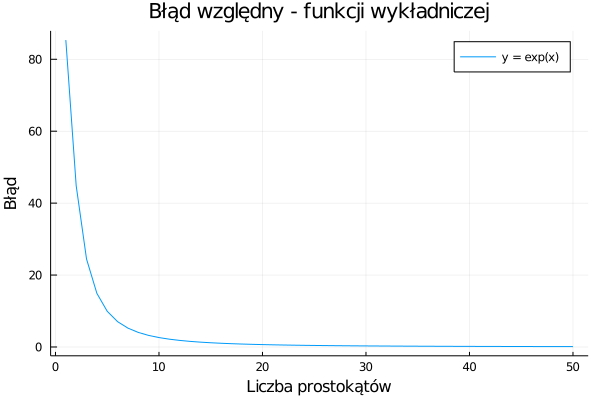

In [321]:
plot(1:50,errs,title = "Błąd względny - funkcji wykładniczej", 
    xlabel = "Liczba prostokątów", ylabel = "Błąd", label = "y = exp(x)")

### 2 Trygonometrycznej sin(x)

In [322]:
f(x) = sin(x)
a = 0
b = 2 * 3.14
real_int = quadgk(f, a, b)[1]
errs = Float64[]

for n=2:50
    rect_int = rect_integral(f, a, b, n)
    e = abs((real_int - rect_int)/real_int)*100
    push!(errs, e)
end

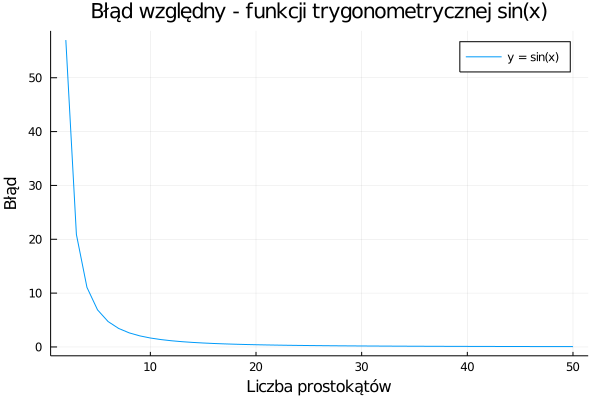

In [323]:
plot(2:50,errs,title = "Błąd względny - funkcji trygonometrycznej sin(x)", 
    xlabel = "Liczba prostokątów", ylabel = "Błąd", label = "y = sin(x)")